In [223]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [88]:
file='../Data/WA_Fn-UseC_-Accounts-Receivable.csv'


#Upload data and check that data has been uploaded
df=pd.read_csv(file)
df.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


# Data Sanity Check

After we have uploaded the data, we can find out the following information:


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   PaperlessDate  2466 non-null   object 
 3   invoiceNumber  2466 non-null   int64  
 4   InvoiceDate    2466 non-null   object 
 5   DueDate        2466 non-null   object 
 6   InvoiceAmount  2466 non-null   float64
 7   Disputed       2466 non-null   object 
 8   SettledDate    2466 non-null   object 
 9   PaperlessBill  2466 non-null   object 
 10  DaysToSettle   2466 non-null   int64  
 11  DaysLate       2466 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


We have <font color='aqua'>11</font> features in total with <font color='aqua'>2466</font> observations.
We can also make the following observations:
- There are <font color='aqua'>4</font> date columns (PaperlessDate, Invoice Data, Settled Date, DueDate) which currently are represented as objects, so will need to convert those later.
- We have <font color='aqua'>3</font> categorical variables (countryCode,Disputed, PaperlessBill), so will need to convert those to bool
- We have <font color='aqua'>1</font> id column (customerID) which is an object
- We have <font color='aqua'>3 </font> numeric columns (InvoiceAmount, DaysToSettle,DaysLate)

We can also observe that there are no Null data, but we can double confirm that by running the following syntax:

In [28]:
#Let us do a data sanity check for Null values
df.isnull().sum()

countryCode      0
customerID       0
PaperlessDate    0
invoiceNumber    0
InvoiceDate      0
DueDate          0
InvoiceAmount    0
Disputed         0
SettledDate      0
PaperlessBill    0
DaysToSettle     0
DaysLate         0
dtype: int64

# Exploratory Data Analysis

Let us explore do a quick descriptive statistical analysis over the numeric columns:

In [27]:
#Let us understand our numeric values in detail:
df.describe()

,countryCode,invoiceNumber,InvoiceAmount,DaysToSettle,DaysLate
count,2466.000000,2.466000e+03,2466.000000,2466.00000,2466.000000
mean,620.446067,4.978431e+09,59.895856,26.44485,3.442417
std,215.933610,2.884272e+09,20.435838,12.33493,6.290607
min,391.000000,6.113650e+05,5.260000,0.00000,0.000000
25%,406.000000,2.528854e+09,46.400000,18.00000,0.000000
50%,770.000000,4.964228e+09,60.560000,26.00000,0.000000
75%,818.000000,7.494512e+09,73.765000,35.00000,5.000000
max,897.000000,9.990244e+09,128.280000,75.00000,45.000000


We can observe countryCode and invoiceNumber have no meaning being numeric columns, thus, we will focus on InvoiceAmount, DaysToSettle and DaysLate where can see the average values, minimum and maximum values for each of the beforementioned variables. In particular, we observe that the average Dayslate without doing any modifications is <font color='aqua'>6.29</font> days, and we can see that the maximum Days Late is <font color='aqua'>45</font> days.

DaysToSettle demonstrates that it takes above <font color='aqua'>26.44</font> to settle an invoice on average. 

Let us look at the countryCode as a categorical feature and see whether it is a useful feature to utilise in the analysis.

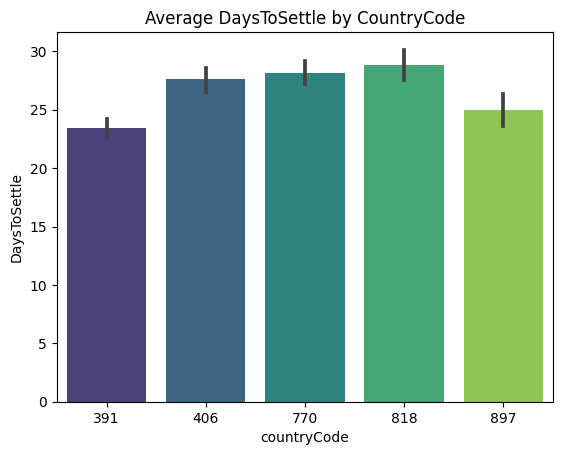

In [44]:
sn.barplot(x='countryCode',y='DaysToSettle', data=df, palette='viridis')
plt.title('Average DaysToSettle by CountryCode')
plt.show()

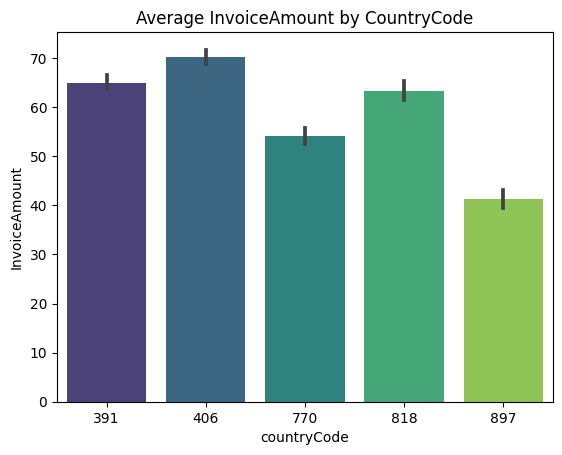

In [45]:
sn.barplot(x='countryCode',y='InvoiceAmount', data=df, palette='viridis')
plt.title("Average InvoiceAmount by CountryCode")
plt.show()

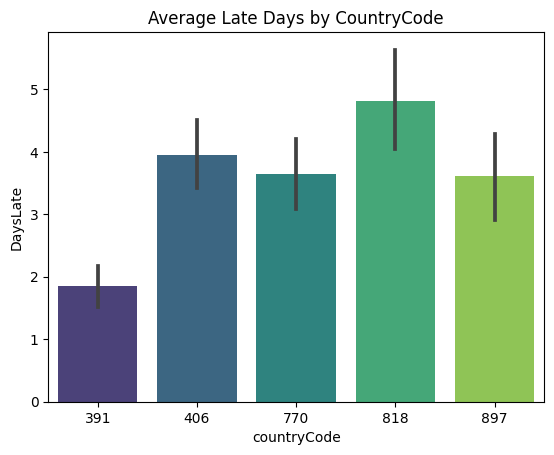

In [46]:
sn.barplot(x='countryCode',y='DaysLate', data=df, palette='viridis')
plt.title("Average Late Days by CountryCode")
plt.show()

By grouping the information using <font color='aqua'>countryCode</font> and representing them as visuals, we can definitely see that the average values change for both InvoiceAmount and DaysToSettle slightly, while the average DaysLate does reduce by <font color='aqua'>50%</font> when grouping the data by country code and then taking the average values.

It looks like from the information provided, with the exception of invoiceNumber and countryCode (as these represent meaningless values), There is a strong correlation between DaysToSettle and DaysLate. This means that there are strong observations that an relationship exist between these two variables.

However, we have other features we can probably extract information from so lets do some feature engineering on ther columns to perform further data exploratory analysis:

In [89]:
#Convert object variables and create features
#Due Date Conversions
df['DueDate']=pd.to_datetime(df['DueDate'])
df['DueYear']=df['DueDate'].dt.year
df['DueMonth']=df['DueDate'].dt.month
df['DueDay']=df['DueDate'].dt.day

#SettledDate Conversions
df['SettledDate']=pd.to_datetime(df['SettledDate'])
df['SettledYear']=df['SettledDate'].dt.year
df['SettledMonth']=df['SettledDate'].dt.month
df['SettledDay']=df['SettledDate'].dt.day

#Invoice Date conversion
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth']=df['InvoiceDate'].dt.month
df['InvoiceDay']=df['InvoiceDate'].dt.day

#Paperless Date conversion
df['PaperlessDate']=pd.to_datetime(df['PaperlessDate'])
df['PaperlessYear']=df['PaperlessDate'].dt.year
df['PaperlessMonth']=df['PaperlessDate'].dt.month
df['PaperlessDay']=df['PaperlessDate'].dt.day   

#Convert Paperlessbill category to dummies
df['PaperlessBill']=df.PaperlessBill.map(dict(Electronic=1, Paper=0))

#lets convert the disputed column to binary
df['Disputed']=df.Disputed.map(dict(Yes=1, No=0))

#We will also use the country code as columns by using dummies
df=df.join(pd.get_dummies(df['countryCode'], dtype=int))


In [104]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',225)
df1.head()

,InvoiceAmount,Disputed,PaperlessBill,DaysToSettle,DaysLate,DueYear,DueMonth,DueDay,SettledYear,SettledMonth,SettledDay,InvoiceYear,InvoiceMonth,InvoiceDay,PaperlessYear,PaperlessMonth,PaperlessDay,391,406,770,818,897
0,55.94,0,0,13,0,2013,2,1,2013,1,15,2013,1,2,2013,4,6,1,0,0,0,0
1,61.74,1,1,36,6,2013,2,25,2013,3,3,2013,1,26,2012,3,3,0,1,0,0,0
2,65.88,0,1,5,0,2013,8,2,2013,7,8,2013,7,3,2012,1,26,1,0,0,0,0
3,105.92,0,1,35,5,2013,3,12,2013,3,17,2013,2,10,2012,4,6,0,1,0,0,0
4,72.27,1,0,34,4,2012,11,24,2012,11,28,2012,10,25,2012,11,26,0,0,0,1,0


Lets group the data by Due Year, and understand the total sum of days late by Due Year: 

Text(0.5, 1.0, 'Sum of DaysLate by Due Year')

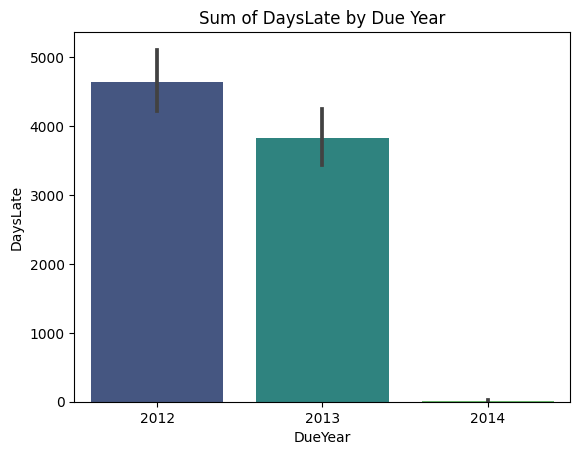

In [72]:
#Let us see the overall total Days Late by Due Year
sn.barplot(x='DueYear',y='DaysLate',data=df,estimator='sum', palette='viridis')
plt.title('Sum of DaysLate by Due Year')

It looks like most of their invoices are provided in the 2012, and 2013, and very few invoices have 2014 due year on them:

In [107]:
#Let us check the groupings
df.groupby(['DueYear'])['customerID'].count()

DueYear
2012    1167
2013    1294
2014       5
Name: customerID, dtype: int64

Let us look at the Invoice Amount they were trying to recover for the earlier years:


Text(0.5, 1.0, 'Sum of DaysLate by Due Year')

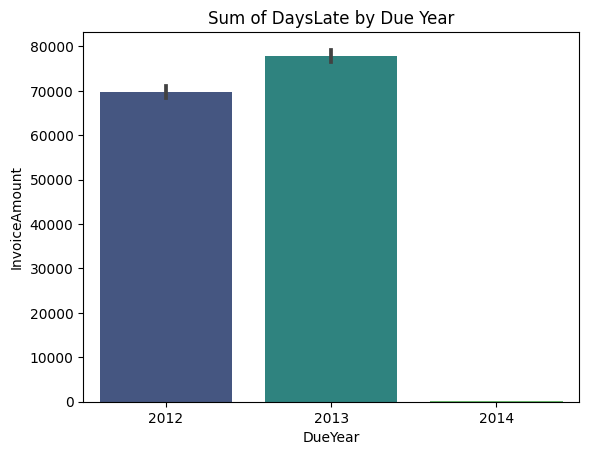

In [108]:
#Let us see the overall total Days Late by Due Year
sn.barplot(x='DueYear',y='InvoiceAmount',data=df,estimator='sum', palette='viridis')
plt.title('Sum of Invoice Amount by Due Year')

We can see that most of the Invoices and related Amounts are only focused to be paid in 2012 and 2013.
Perhaps lets take a look at the information from the Due Month perspective:

<AxesSubplot: xlabel='DueMonth', ylabel='DaysLate'>

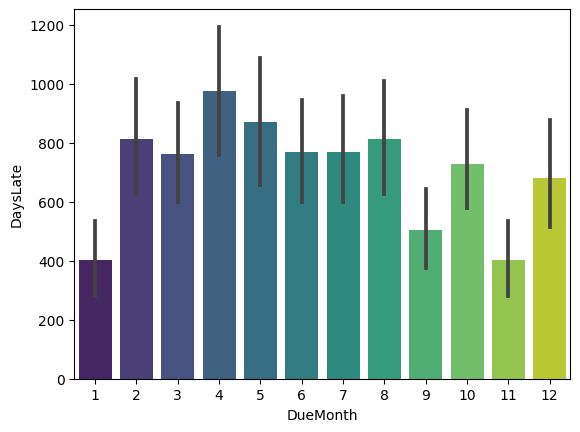

In [71]:
sn.barplot(x='DueMonth',y='DaysLate',data=df,estimator='sum', palette='viridis')

It looks like the due months are somewhat evenly distributed across all months, but there are considerably less invoices with Due Months in January, September and November.


# Relationship & Correlation Analysis

Let us take a closer look at the relationship the different variables have in this datasets and how they correlates with one another:

/var/folders/81/kzg9lc7n4t15f722_x0fq6lw0000gn/T/ipykernel_85028/3544193988.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

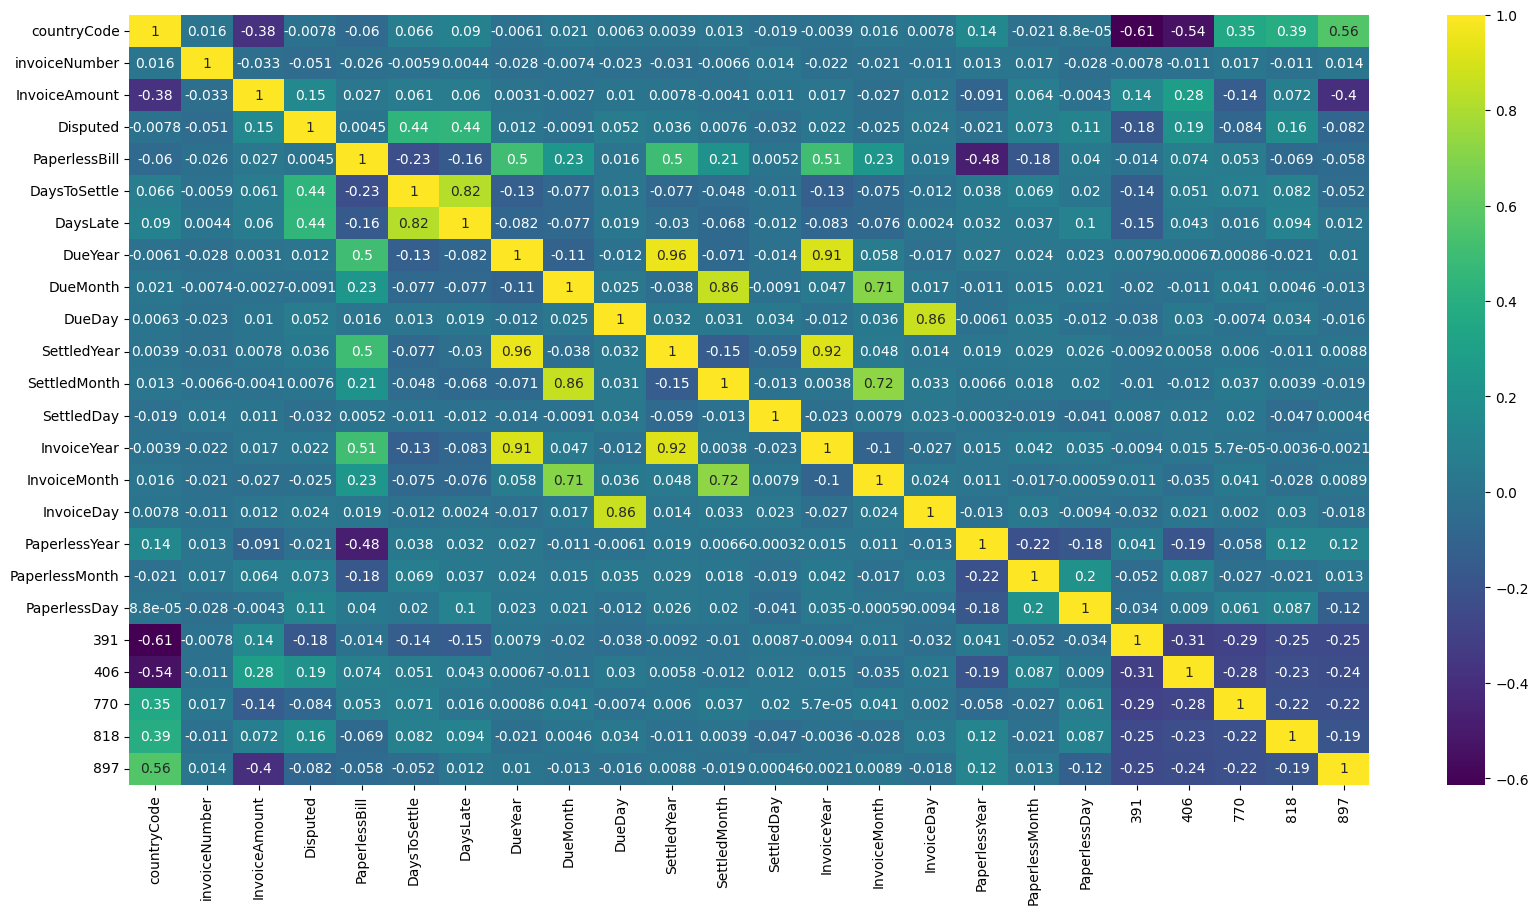

In [90]:
plt.figure(figsize=(20,10))
sn.heatmap(df.corr(),annot=True,cmap='viridis')

/var/folders/81/kzg9lc7n4t15f722_x0fq6lw0000gn/T/ipykernel_85028/725864055.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



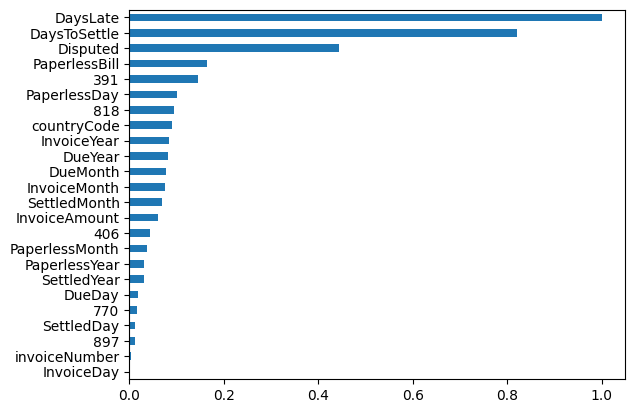

In [92]:
correlation=df.corr()
abs(correlation['DaysLate']).sort_values(ascending=True).plot(kind='barh')
plt.show()

From the above graph, we can see that <font color='aqua'>DaysLate </font> and <dont color='aqua'>DaysToSettle</font> are the most correlated values followed by <font color='aqua'>Disputed </font> . Let us look into the relationship between these three variables.

First, lets visualise a scatter plot between DaysToSettle and Invoice Amount, and group the observations by Disputed:


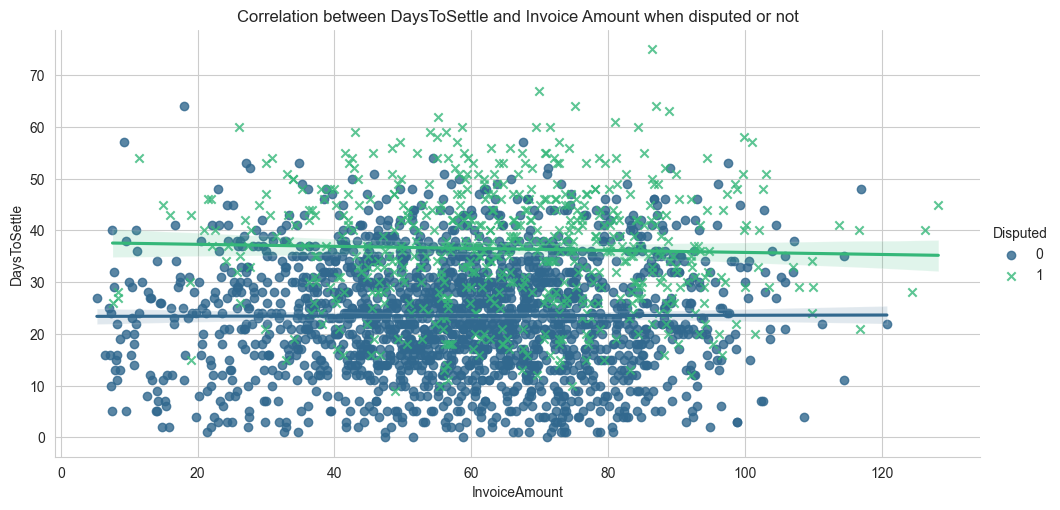

In [115]:
sn.set_style('whitegrid')

sn.lmplot(y="DaysToSettle", x="InvoiceAmount", hue="Disputed", data=df ,markers=["o", "x"], palette="viridis", aspect = 2);
plt.title('Correlation between DaysToSettle and Invoice Amount when disputed or not')

plt.show()

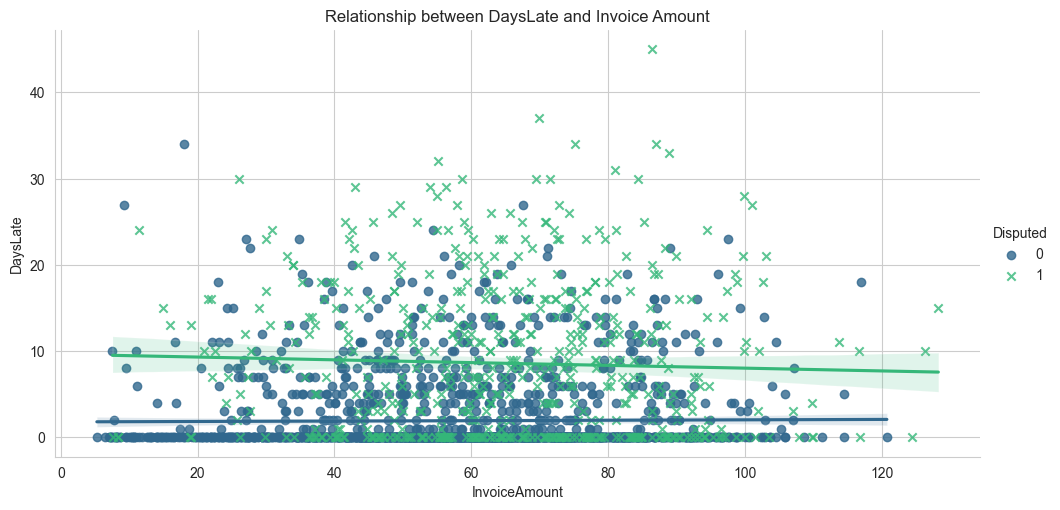

In [114]:
sn.lmplot(x="InvoiceAmount", y="DaysLate", hue="Disputed", data=df,markers=["o", "x"], palette="viridis", aspect = 2);

plt.title('Relationship between DaysLate and Invoice Amount when Disputed or not')
plt.show()

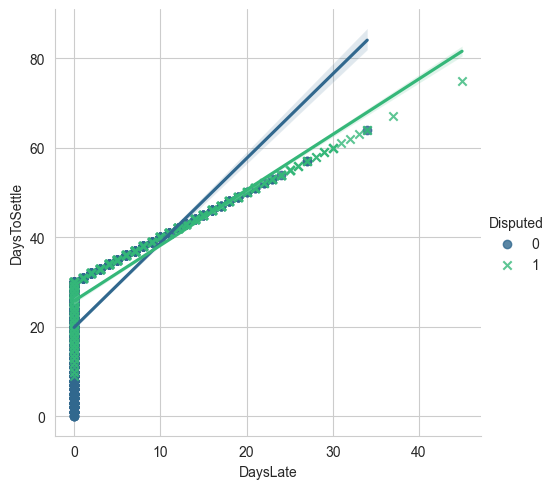

In [120]:
sn.lmplot(x='DaysLate',y='DaysToSettle', hue='Disputed',data=df, palette='viridis', markers=['o','x'])


We can observe from the above charts that there is a strong relationship where the days to settle the bill increases when there are disputes involved. 
Now that we have made some exploratory analysis, let us also perform an aging analysis on the accounts receivable to see how the invoices age.

# Trand and Aging Analysis

Let us also find out how the invoices are being settled by aging buckets. Here we want to find out whether there are the amount of the invoice has an impact on how long it takes to settle.

In [129]:
AgingBucket= []

for i in df['DaysToSettle']:
    if i <=30:
        AgingBucket.append('0-30days')
    elif i >30 and i <=60:
        AgingBucket.append('31-60days')
    elif i >60 and i <=90:
        AgingBucket.append('61-90days')
    else:
        AgingBucket.append('>90')

df['AgingBucket'] =AgingBucket

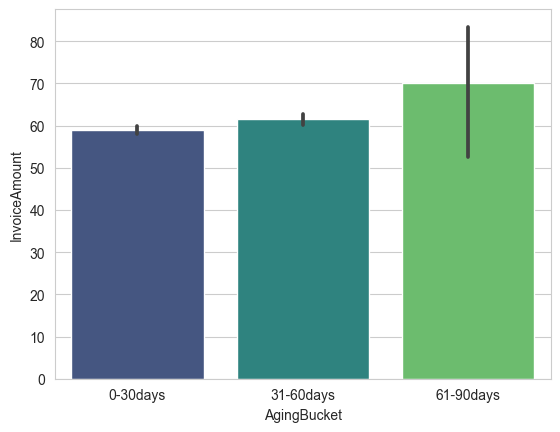

In [133]:
#Lets graph the Aging Bucket
sn.barplot(x='AgingBucket',y='InvoiceAmount',data=df,palette='viridis')
plt.show()

We can observe on average that invoice amounts of less than 60, mostly get settled within the first 30 days, while higher amounts take longer time to settle. It is good to note that there are no invoices that have taken longer than 90 days to settle from this dataset.

We also want to know the trend of these invoices in general, is the days to settle increasing, decreasing, is this company providing more invoices over time or less invoices over time. 

In [158]:
df.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,DueYear,DueMonth,DueDay,SettledYear,SettledMonth,SettledDay,InvoiceYear,InvoiceMonth,InvoiceDay,PaperlessYear,PaperlessMonth,PaperlessDay,391,406,770,818,897,AgingBucket
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,0,2013-01-15,0,13,0,2013,2,1,2013,1,15,2013,1,2,2013,4,6,1,0,0,0,0,0-30days
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,1,2013-03-03,1,36,6,2013,2,25,2013,3,3,2013,1,26,2012,3,3,0,1,0,0,0,31-60days
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,0,2013-07-08,1,5,0,2013,8,2,2013,7,8,2013,7,3,2012,1,26,1,0,0,0,0,0-30days
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,0,2013-03-17,1,35,5,2013,3,12,2013,3,17,2013,2,10,2012,4,6,0,1,0,0,0,31-60days
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,1,2012-11-28,0,34,4,2012,11,24,2012,11,28,2012,10,25,2012,11,26,0,0,0,1,0,31-60days


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   countryCode     2466 non-null   int64         
 1   customerID      2466 non-null   object        
 2   PaperlessDate   2466 non-null   datetime64[ns]
 3   invoiceNumber   2466 non-null   int64         
 4   InvoiceDate     2466 non-null   datetime64[ns]
 5   DueDate         2466 non-null   datetime64[ns]
 6   InvoiceAmount   2466 non-null   float64       
 7   Disputed        2466 non-null   int64         
 8   SettledDate     2466 non-null   datetime64[ns]
 9   PaperlessBill   2466 non-null   int64         
 10  DaysToSettle    2466 non-null   int64         
 11  DaysLate        2466 non-null   int64         
 12  DueYear         2466 non-null   int64         
 13  DueMonth        2466 non-null   int64         
 14  DueDay          2466 non-null   int64         
 15  Sett

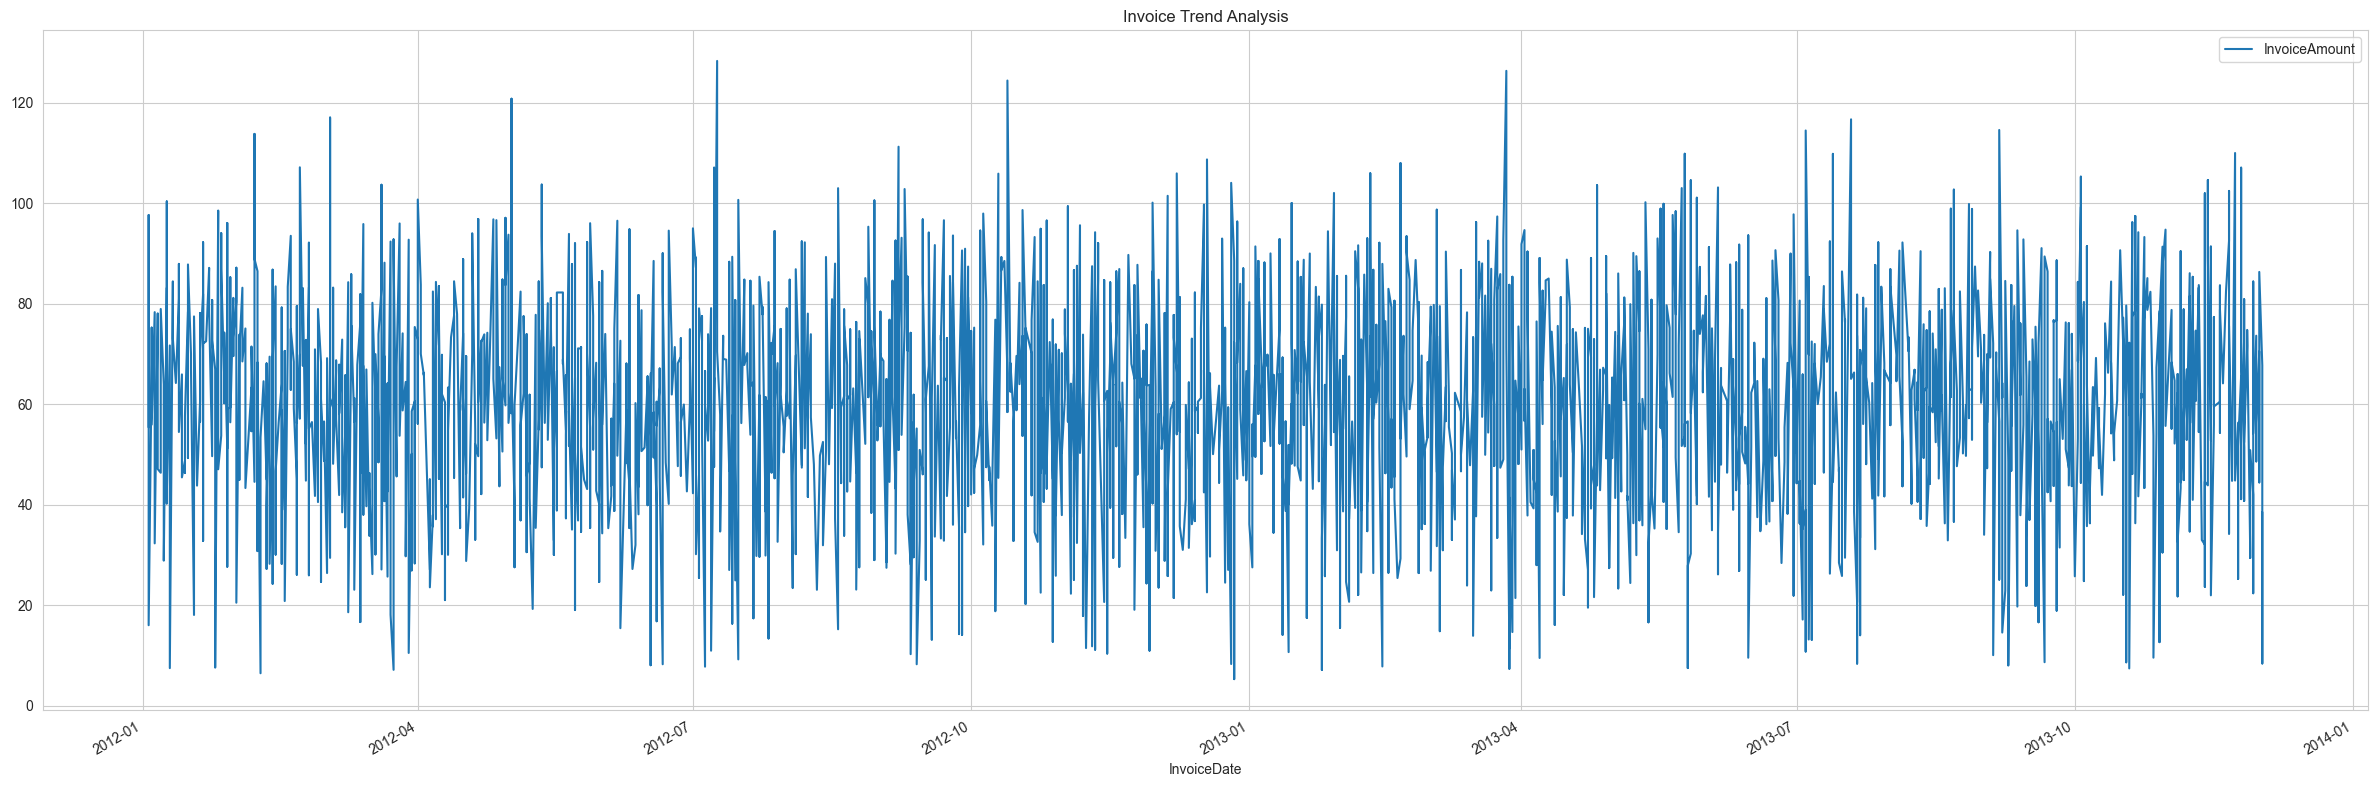

In [180]:

df.plot(kind='line', x='InvoiceDate',y='InvoiceAmount', figsize=(30,10))
plt.title('Invoice Trend Analysis')
plt.show()



We can see a consistent overall trend of invoices over time that fluctuates heavily within the 40 - 80 amount mark with tails that go above 120 and beloe 20.

# Prediction

We want to now understand whether we could use this data to make predictions. Let us understand what sort of information we want to understand:
- First we want to check if we can discover relationships between the variables available against the days late variable using regression models


## Regression Models

Regression models can help determine the relationship between variables. This type of model can predict values such as length, temperature, or age, thus uncovering relationships between variables as it analyzes data points. 

| <font color='aqua'>Model Name </font> | <font color='aqua'>Description</font> | <font color='aqua'>Model Type</font>  |
|---|---|---|
| Linear Regression | Linear Regression is a regression model, meaning, it’ll take features and predict a continuous output, which in our case is the DaysLate variable. It is a parametric model, which means that the model captures all its predictions within a finite set of parameters. |  Linear |
| Kneighbor Regression |   Kneighbor Regression is a non-parametric model which often does not confirm to the normal distribution. The basic logic behind KNN is to explore your neighborhood, assume the test datapoint to be similar to them and derive the output. In KNN, we look for k neighbors and come up with the prediction. |  Non-Linear |
| Random Forest Regression |  Random Forest is a collection of decision trees where the average or majority vote of the forest is selected as the predicted output. Random Forest model will be less prone to overfitting than Decision tree, and gives a more generalized solution, therefore I went straight for the Random forest regression model. |  Decision Tree |
| Gradient Boost Regression | Gradient Boost Regression is an ensemble method model, where it creates multiple weaker models and combine them to get better performance as a whole. | Ensemble Method |



## Splitting the data and standardising the data

We will know take a copy of the dataframe, drop unwanted columns and split the data:




In [134]:
#Copy the data frame
df1=df.copy()

#Drop columns
df1.drop(['customerID','countryCode','PaperlessDate','invoiceNumber','InvoiceDate','DueDate','SettledDate'],axis=1, inplace=True)

In [137]:
df1=df1.join(pd.get_dummies(df['AgingBucket'],dtype=int))

In [202]:
#Splitting the data
X=df1.drop(['DaysLate','AgingBucket'],axis=1)
y=df1['DaysLate']

#Ensure all columns as strings
X.columns= X.columns.astype(str)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Looking at the shape of our training and testing data sets and labels

In [204]:
print('Shape of training dataset:', X_train.shape)
print('Shape of testing dataset:', X_test.shape)
print('Shape of training labels:', y_train.shape)
print('Shape of testing labels:', y_test.shape)

Shape of training dataset: (1972, 24)
Shape of testing dataset: (494, 24)
Shape of training labels: (1972,)
Shape of testing labels: (494,)


## Standardisation

It is always good to standardise and scale the data so that we do not have any emphasis on heavier numbers.

In [203]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Selecting the Models and Training

Let us know train our models using the regressors we have chosen above:

In [226]:
regressors = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]

for model in regressors[:len(regressors)]:
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    score= model.score(X_train,y_train)
    print(model)
    print("\tMean squared error:", mean_squared_error(y_test, y_pred))
    print("\tModel Score:", score)
    print("\tR2 score:", r2_score(y_test, y_pred))
    print("\t")

LinearRegression()
	Mean squared error: 4.5629457870800895e+25
	Model Score: 0.7284971843501412
	R2 score: -1.1428104119275501e+24
	
RandomForestRegressor()
	Mean squared error: 0.31654291497975723
	Model Score: 0.9999639818036974
	R2 score: 0.9920720395126094
	
GradientBoostingRegressor()
	Mean squared error: 0.23136105243059685
	Model Score: 0.9999999984357255
	R2 score: 0.9942054577904289
	
KNeighborsRegressor()
	Mean squared error: 8.96914979757085
	Model Score: 0.8198118665088009
	R2 score: 0.7753635863081111
	
